# TASK-2:
Develop the ML model(s) to predict the credit risk(low or high) for a given applicant.

# Read data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as mt
A = mt.read_csv("C:/Users/SHREE/OneDrive/Desktop/Data/loan.csv")

# Preview

In [2]:
A.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


# Drop unwanted columes

In [3]:
A = A.drop(labels=["loan_application_id","applicant_id"],axis=1)

# Missing data treatment

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Months_loan_taken_for                        1000 non-null   int64 
 1   Purpose                                      988 non-null    object
 2   Principal_loan_amount                        1000 non-null   int64 
 3   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 4   Property                                     846 non-null    object
 5   Has_coapplicant                              1000 non-null   int64 
 6   Has_guarantor                                1000 non-null   int64 
 7   Other_EMI_plans                              186 non-null    object
 8   Number_of_existing_loans_at_this_bank        1000 non-null   int64 
 9   Loan_history                                 1000 non-null   object
 10  high_risk_app

In [5]:
from important_tool import replacer
replacer(A)

# Define X and Y

In [6]:
Y = A[["high_risk_applicant"]]
X = A.drop(labels=["high_risk_applicant"],axis=1)

# Exploratory Data Analysis

In [7]:
A.corr()

,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
Months_loan_taken_for,1.000000,0.624984,0.074749,0.029698,-0.039594,-0.011284,0.214927
Principal_loan_amount,0.624984,1.000000,-0.271316,0.079076,-0.065237,0.020795,0.154739
EMI_rate_in_percentage_of_disposable_income,0.074749,-0.271316,1.000000,-0.013048,-0.006429,0.021669,0.072404
Has_coapplicant,0.029698,0.079076,-0.013048,1.000000,-0.048426,-0.006001,0.062728
Has_guarantor,-0.039594,-0.065237,-0.006429,-0.048426,1.000000,-0.024682,-0.055039
Number_of_existing_loans_at_this_bank,-0.011284,0.020795,0.021669,-0.006001,-0.024682,1.000000,-0.045732
high_risk_applicant,0.214927,0.154739,0.072404,0.062728,-0.055039,-0.045732,1.000000


In [8]:
A.describe()

,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


<AxesSubplot:>

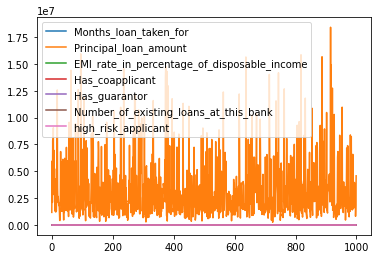

In [9]:
A.plot()

In [10]:
from important_tool import preprocessing
Xnew = preprocessing(X)

# Divide data in training and testing

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=25)

# Create a Multiple Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
testing_error = mean_absolute_error(ytest,pred_ts)
training_error = mean_absolute_error(ytrain,pred_tr)
Difference = training_error-testing_error

In [13]:
testing_error

0.36873185686776944

In [14]:
training_error

0.3544923714544058

In [15]:
Difference

-0.014239485413363617

# Cross validation

In [16]:
Q = []
x = 0.99
for i in range(0,100,1):
    x = x + 0.001
    x = round(x,4)
    Q.append(x)

# Ridge

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rr = Ridge()
tg ={"alpha":Q}
cv = GridSearchCV(rr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.991}

In [18]:
rr = Ridge(alpha=0.991)
model = rr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
testing_error = mean_absolute_error(ytest,pred_ts)
training_error = mean_absolute_error(ytrain,pred_tr)
Difference = training_error-testing_error

In [19]:
testing_error

0.3688944767876663

In [20]:
training_error

0.3549804595223614

In [21]:
Difference

-0.01391401726530489

# Prediction

In [22]:
Q = []
for i in model.predict(xtest):
    if(i[0] < 0.5):
        Q.append(0)
    else:
        Q.append(1)

In [23]:
Q

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]